In [1]:
# Import and load the required libraries :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset :

# The dataset contains details of more then 7000 apple store applications

apple=pd.read_csv('/home/shrihari/anaconda3/OG/datasets/apple/AppleStore.csv')
apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
# Number of rows and columns in dataset :

apple.shape

(7197, 17)

In [4]:
# Basic information about the dataset :

apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 956.0+ KB


In [5]:
# check for null/missing  values :

apple.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [6]:
# Droping unwanted columns from the dataset :

# We can drop Unnamed: 0, id ,currency, ver columns from the dataset 

apple.drop(['Unnamed: 0','id','currency','ver'],axis=1,inplace=True)


# since currency of all data in 'USD' only so no need of this column
# ver, id, unnamed: 0 does not impact much on EDA, so we can drop them

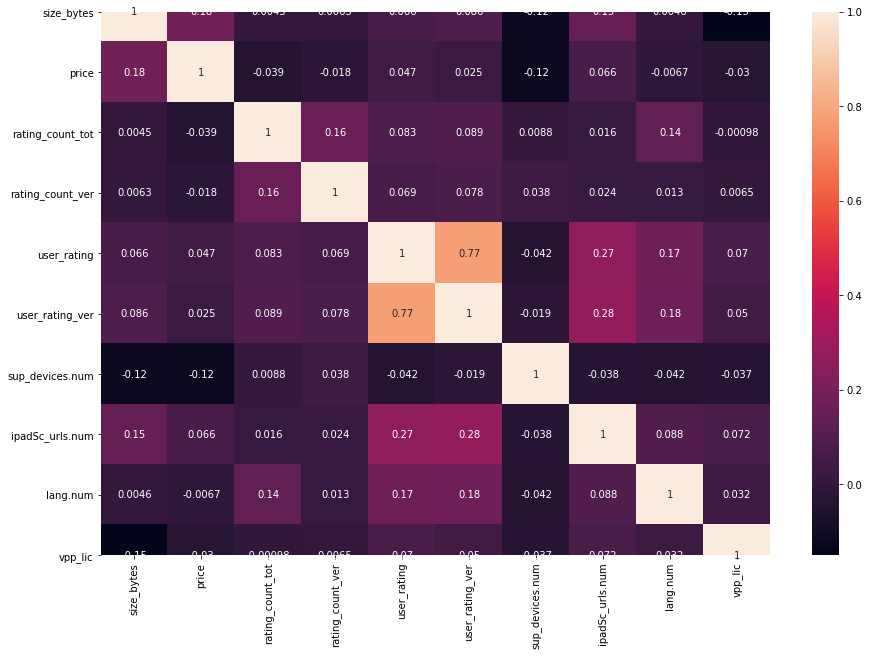

In [7]:
# check the corelation between each columns :

fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(apple.corr(),annot=True)
plt.show()

In [8]:
# Observations :

# we can see that user_rating_ver and user_rating have good corelation

In [9]:

unpaid_apps=apple[apple['price']==0]
unpaid=unpaid_apps['prime_genre'].value_counts().to_frame(name='free')

unpaid

,free
Games,2257
Entertainment,334
Photo & Video,167
Social Networking,143
Education,132
Shopping,121
Utilities,109
Lifestyle,94
Finance,84
Sports,79


In [10]:
paid_apps=apple[apple['price']!=0]
paid=paid_apps['prime_genre'].value_counts().to_frame(name='paid')

paid

,paid
Games,1605
Education,321
Entertainment,201
Photo & Video,182
Utilities,139
Productivity,116
Health & Fitness,104
Music,71
Lifestyle,50
Book,46


In [11]:
total=pd.DataFrame(apple['prime_genre'].value_counts())
total

,prime_genre
Games,3862
Entertainment,535
Education,453
Photo & Video,349
Utilities,248
Health & Fitness,180
Productivity,178
Social Networking,167
Lifestyle,144
Music,138


In [12]:
df=total.join(paid)
df=df.join(unpaid)
df

,prime_genre,paid,free
Games,3862,1605,2257
Entertainment,535,201,334
Education,453,321,132
Photo & Video,349,182,167
Utilities,248,139,109
Health & Fitness,180,104,76
Productivity,178,116,62
Social Networking,167,24,143
Lifestyle,144,50,94
Music,138,71,67


In [13]:
paid_apps.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1
5,Shanghai Mahjong,10485713,0.99,8253,5516,4.0,4.0,4+,Games,47,5,1,1
8,PCalc - The Best Calculator,49250304,9.99,1117,4,4.5,5.0,4+,Utilities,37,5,1,1
9,Ms. PAC-MAN,70023168,3.99,7885,40,4.0,4.0,4+,Games,38,0,10,1
10,Solitaire by MobilityWare,49618944,4.99,76720,4017,4.5,4.5,4+,Games,38,4,11,1


#  How do you visualize price distribution of paid apps ?

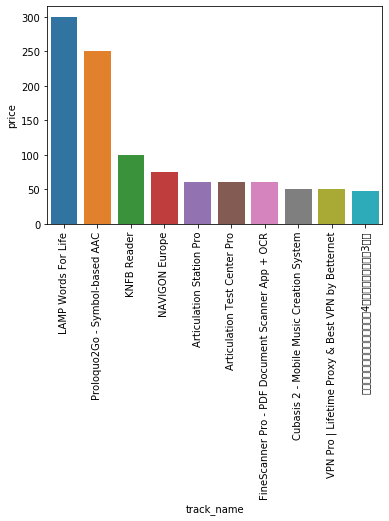

In [15]:
# Top 10 paid apps :

df1=paid_apps.nlargest(10,['price'])


sns.barplot(df1['track_name'],df1['price'])
plt.xticks(rotation=90)
plt.show()


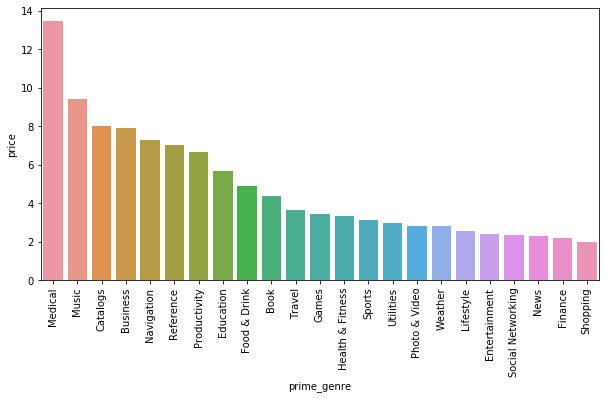

In [50]:
# Average price of each apps in each genre :

x=paid_apps.groupby('prime_genre').agg({'price':np.mean}).sort_values(by='price',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x.index,x['price'])
plt.xticks(rotation=90)
plt.show()

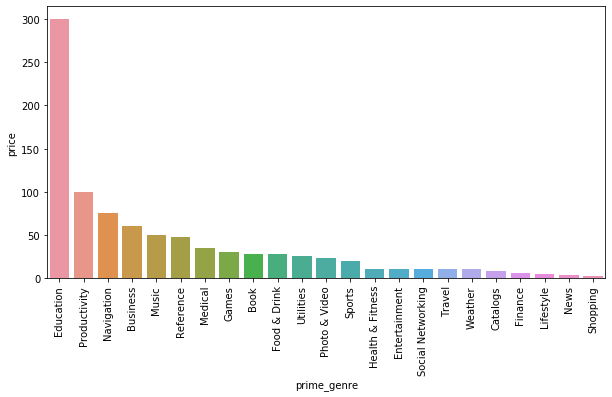

In [48]:
# Top paid apps in each category (prime_genre)

y=paid_apps.groupby(['prime_genre']).agg({'price':max}).sort_values(by='price',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(y.index,y['price'])
plt.xticks(rotation=90)
plt.show()

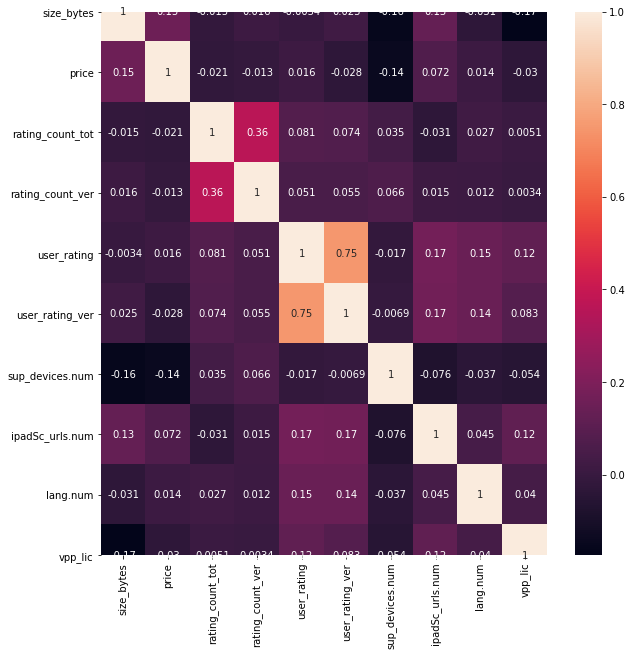

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(paid_apps.corr(),annot=True)
plt.show()

In [54]:
# Apps which are paid more then 50 USD :

paid_apps[paid_apps['price']>50.00][['prime_genre','track_name','price']]

,prime_genre,track_name,price
115,Education,Proloquo2Go - Symbol-based AAC,249.99
162,Navigation,NAVIGON Europe,74.99
1136,Education,Articulation Station Pro,59.99
1479,Education,LAMP Words For Life,299.99
2181,Education,Articulation Test Center Pro,59.99
2568,Productivity,KNFB Reader,99.99
3238,Business,FineScanner Pro - PDF Document Scanner App + OCR,59.99


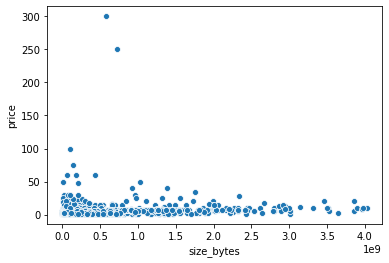

In [56]:
# price v/s size of the app :

sns.scatterplot(paid_apps['size_bytes'],paid_apps['price'])
plt.show()

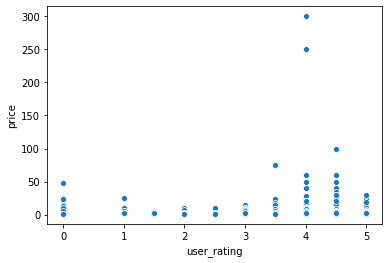

In [58]:
# price v/s user_rating of the apps :

sns.scatterplot(paid_apps['user_rating'],paid_apps['price'])
plt.show()

In [ ]:
# OBSERVATIONS :

# 1) Only few apps are heighest paid, that too in education and productivity category
# 2) the price of the apps does not depend upon the ratings or size
# 3) in shopping,news,food and lifestyle category,catlogs, only few apps are paid.
# 4) Most of the music,games,education,productivity,health,sports are paid one.
# 5) only few apps charges more then 50 usd.


# 2) How does the price distribution get affected by category ?

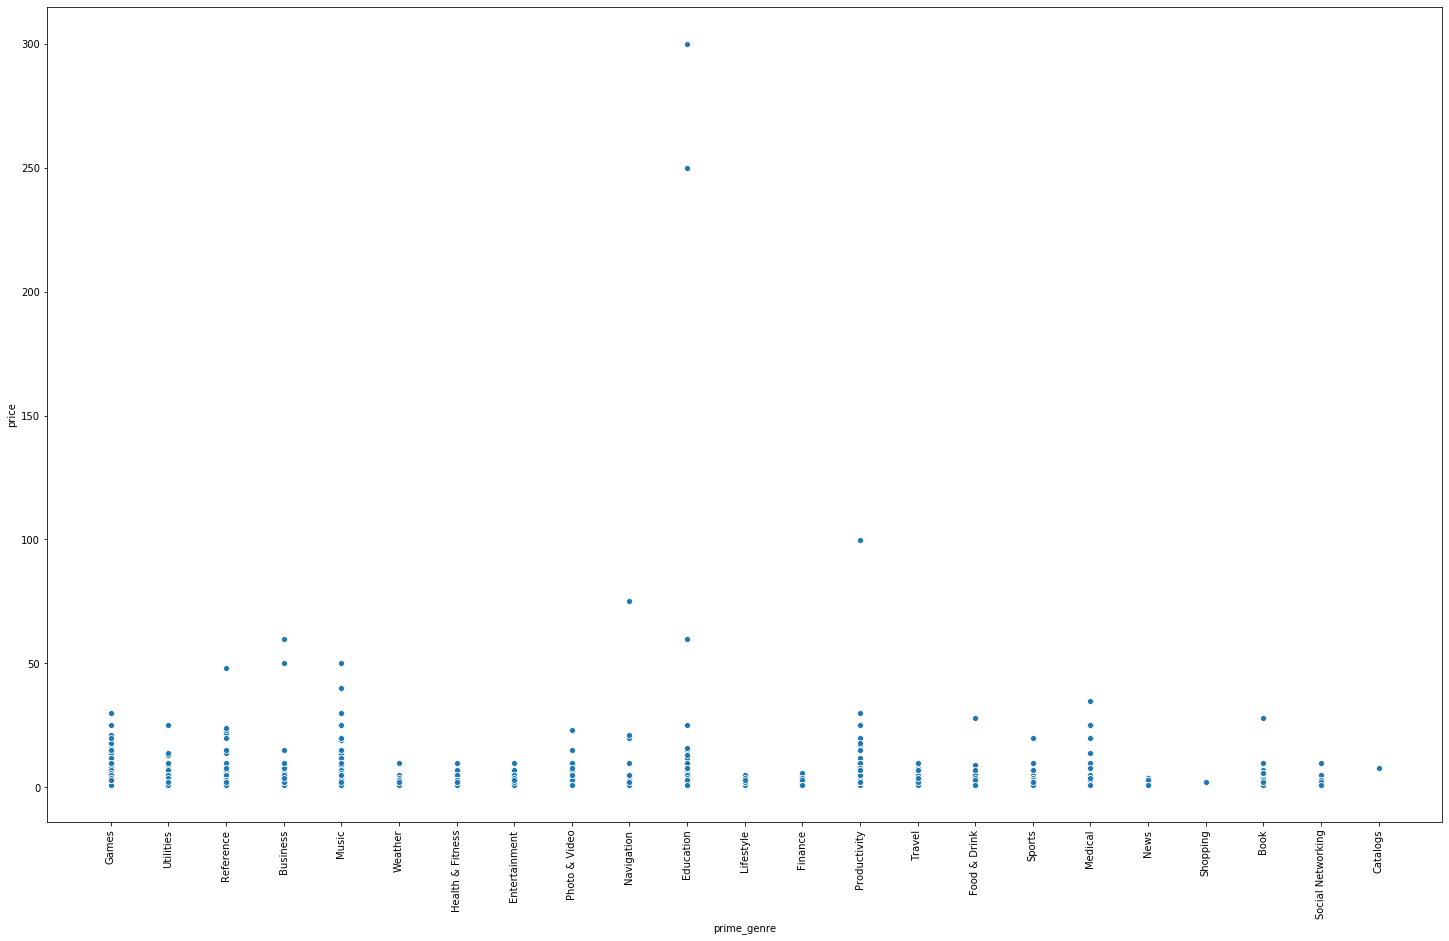

In [23]:
plt.figure(figsize=(25,15))
plt.xticks(rotation=90)
sns.scatterplot(x='prime_genre',y='price',data=paid_apps)

In [ ]:
# OBSERVATION :

# 1). the commom price of apps is 40.
# 2). the most  highly priced apps are : Games,Reference,Music,Productivity,Medical,Education


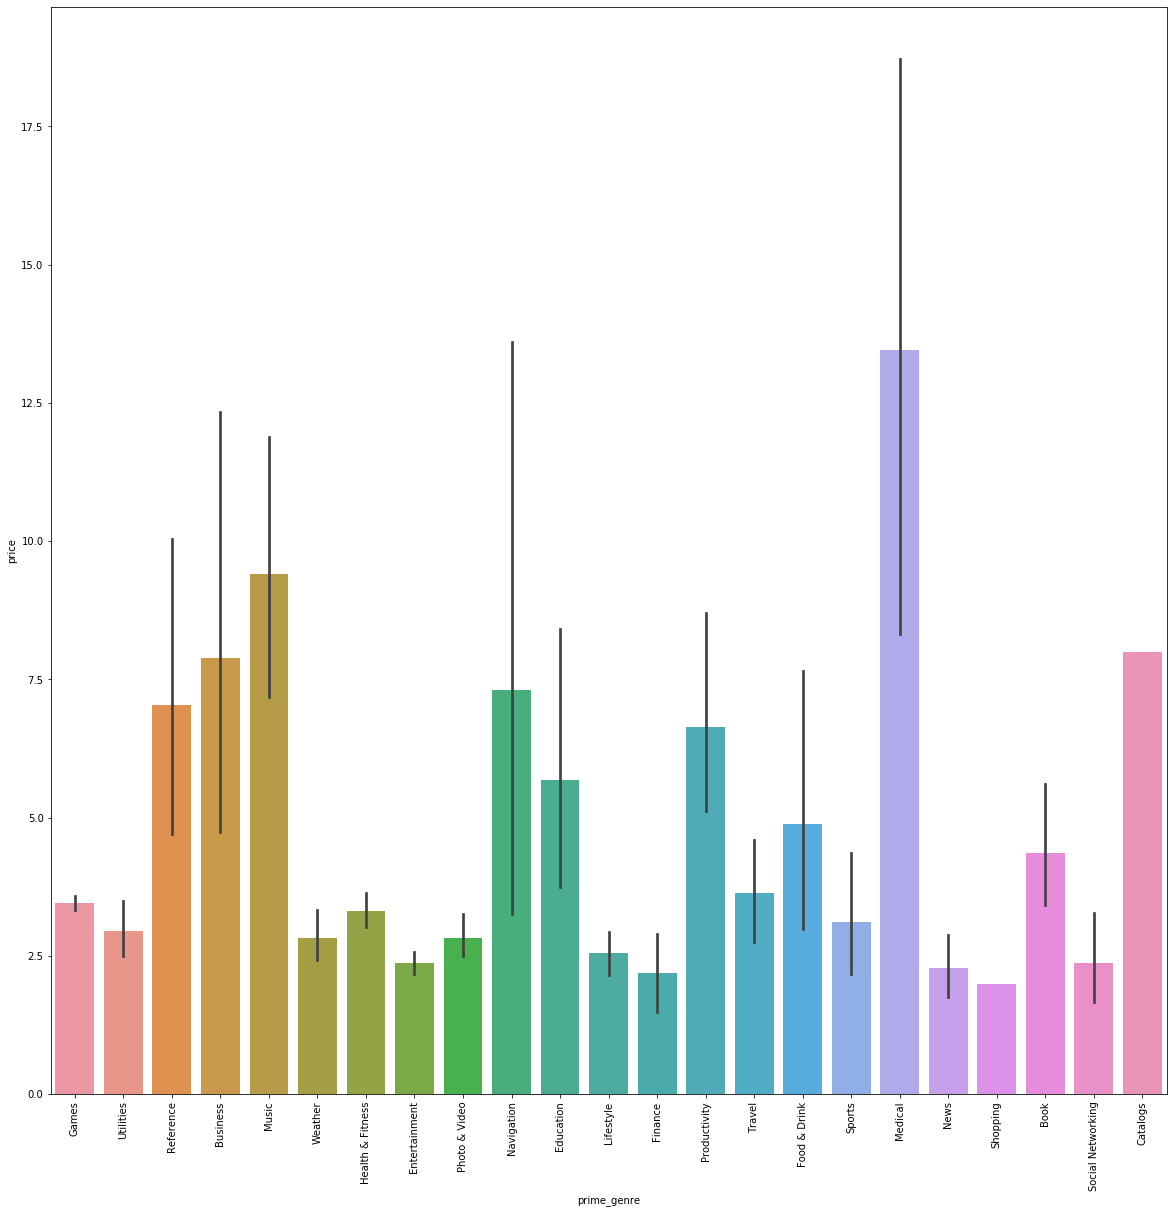

In [24]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(x=paid_apps['prime_genre'],y=paid_apps['price'])

# 3) Price Distribution of Apps - Top 5 Categories

In [25]:
paid_apps['prime_genre'].value_counts().head()


Games            1605
Education         321
Entertainment     201
Photo & Video     182
Utilities         139
Name: prime_genre, dtype: int64

In [27]:
paid_games=paid_apps[paid_apps['prime_genre']=='Games']
paid_education=paid_apps[paid_apps['prime_genre']=='Education']
paid_enter=paid_apps[paid_apps['prime_genre']=='Entertainment']
paid_photo=paid_apps[paid_apps['prime_genre']=='Photo & Video']
paid_utilities=paid_apps[paid_apps['prime_genre']=='Utilities']

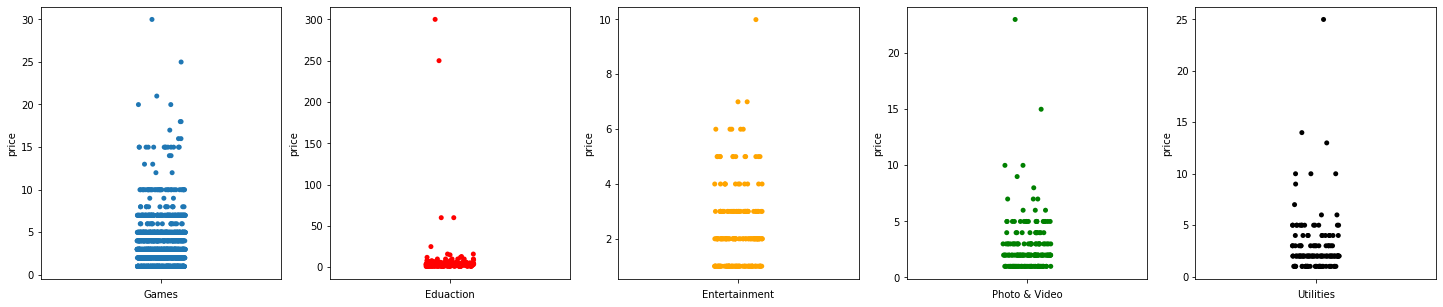

In [28]:
plt.figure(figsize=(25,5))
plt.subplot(1,5,1)
sns.stripplot(data=paid_games,y='price',jitter=True)
plt.xlabel('Games')

plt.subplot(1,5,2)
sns.stripplot(data=paid_education,y='price',jitter=True,color='red')
plt.xlabel('Eduaction')

plt.subplot(1,5,3)
sns.stripplot(data=paid_enter,y='price',jitter=True,color='orange')
plt.xlabel('Entertainment')


plt.subplot(1,5,4)
sns.stripplot(data=paid_photo,y='price',jitter=True,color='green')
plt.xlabel('Photo & Video')


plt.subplot(1,5,5)
sns.stripplot(data=paid_utilities,y='price',jitter=True,color='black')
plt.xlabel('Utilities')

plt.show()

# Paid apps v/s unpaid apss :

In [29]:

unpaid_apps=apple[apple['price']==0]
unpaid=unpaid_apps['prime_genre'].value_counts().to_frame(name='free')
paid=paid_apps['prime_genre'].value_counts().to_frame(name='paid')
total=pd.DataFrame(apple['prime_genre'].value_counts())

In [30]:
apple_price=total.join(paid).join(unpaid)
apple_price

,prime_genre,paid,free
Games,3862,1605,2257
Entertainment,535,201,334
Education,453,321,132
Photo & Video,349,182,167
Utilities,248,139,109
Health & Fitness,180,104,76
Productivity,178,116,62
Social Networking,167,24,143
Lifestyle,144,50,94
Music,138,71,67


In [16]:
apple_price.columns=['total','paid','free']
apple_price

,total,paid,free
Games,3862,1605,2257
Entertainment,535,201,334
Education,453,321,132
Photo & Video,349,182,167
Utilities,248,139,109
Health & Fitness,180,104,76
Productivity,178,116,62
Social Networking,167,24,143
Lifestyle,144,50,94
Music,138,71,67


In [137]:
apple_price['paid_percentage']=(apple_price['paid']/apple_price['total'])*100
apple_price['free_percentage']=(apple_price['free']/apple_price['total'])*100
apple_price

,total,paid,free,paid_percentage,free_percentage
Games,3862,1605,2257,41.558778,58.441222
Entertainment,535,201,334,37.570093,62.429907
Education,453,321,132,70.860927,29.139073
Photo & Video,349,182,167,52.148997,47.851003
Utilities,248,139,109,56.048387,43.951613
Health & Fitness,180,104,76,57.777778,42.222222
Productivity,178,116,62,65.168539,34.831461
Social Networking,167,24,143,14.371257,85.628743
Lifestyle,144,50,94,34.722222,65.277778
Music,138,71,67,51.449275,48.550725


In [140]:
apple_price_percentage=apple_price[['paid_percentage','free_percentage']]
apple_price_percentage

,paid_percentage,free_percentage
Games,41.558778,58.441222
Entertainment,37.570093,62.429907
Education,70.860927,29.139073
Photo & Video,52.148997,47.851003
Utilities,56.048387,43.951613
Health & Fitness,57.777778,42.222222
Productivity,65.168539,34.831461
Social Networking,14.371257,85.628743
Lifestyle,34.722222,65.277778
Music,51.449275,48.550725


<Figure size 7.2e+20x72000 with 0 Axes>

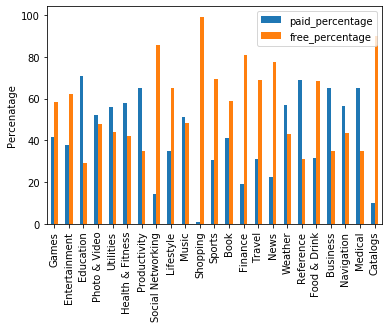

In [178]:
plt.figure(figsize=(10000000000000000000,1000))
apple_price_percentage.plot.bar()
plt.ylabel('Percenatage')
plt.show()

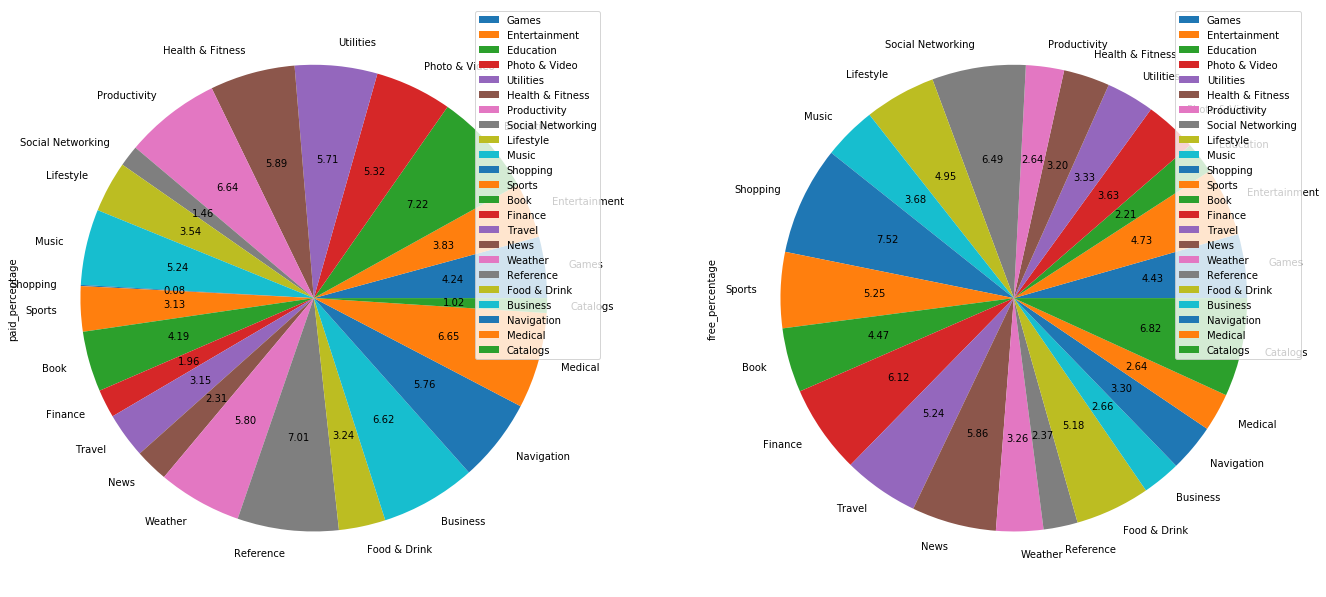

In [216]:

apple_price_percentage.plot.pie(subplots=True,figsize=(23,53),autopct='%.2f')
plt.legend(loc='upper right')

plt.show()

In [217]:
# OBSERVATION :

# Education sector has few free apss compared to other sector
# Many of the sector have free apps.


# 5 - Are paid apps good enough ?

In [60]:
def check(x):
    if x==0:
        return 'free'
    else:
        return 'paid'
    
    
apple['status']=pd.DataFrame(apple['price'].apply(lambda x:check(x)))    

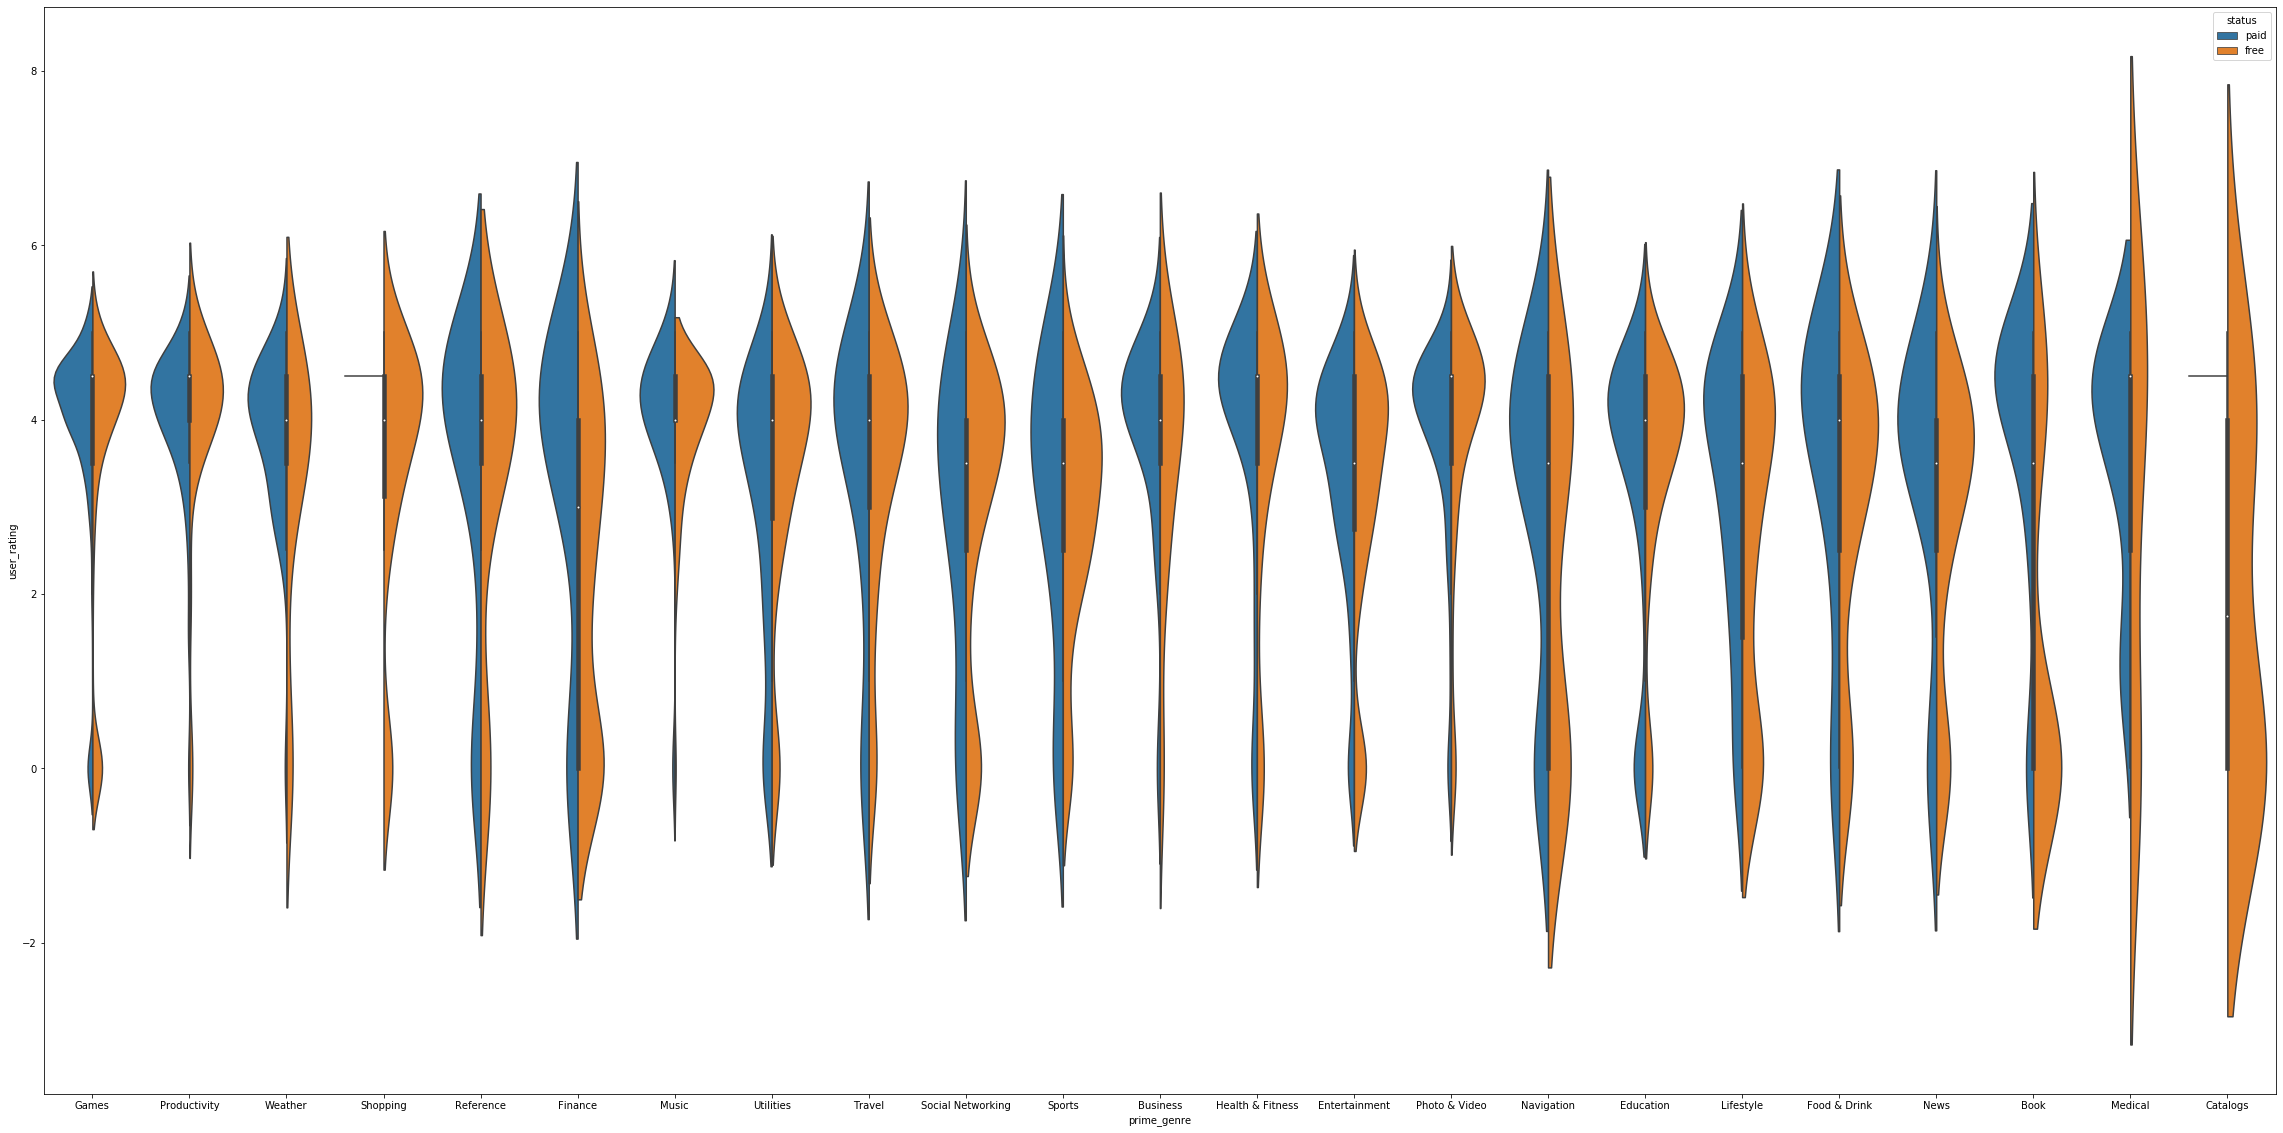

In [61]:
plt.figure(figsize=(40,20))
sns.violinplot(data=apple,y='user_rating',x='prime_genre',hue='status',split=True)

In [241]:
# Observation :

# all most all the paid apps have medain of user rating between 4 and 5, so we can conclude that they are good one

# 6 - As the size of the app increases do they get pricier ?

/home/shrihari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


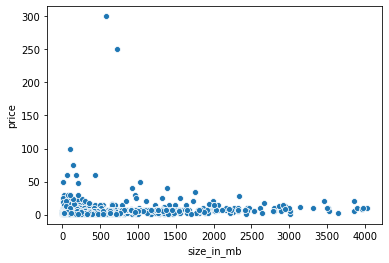

In [248]:
paid_apps['size_in_mb']=paid_apps['size_bytes']/1000000
sns.scatterplot(x='size_in_mb',y='price',data=paid_apps)
plt.show()

In [249]:
# OBSERVATION :

# from above graph we can conclude that price and size apps have no relationship.



# How are the apps distributed category wise ?

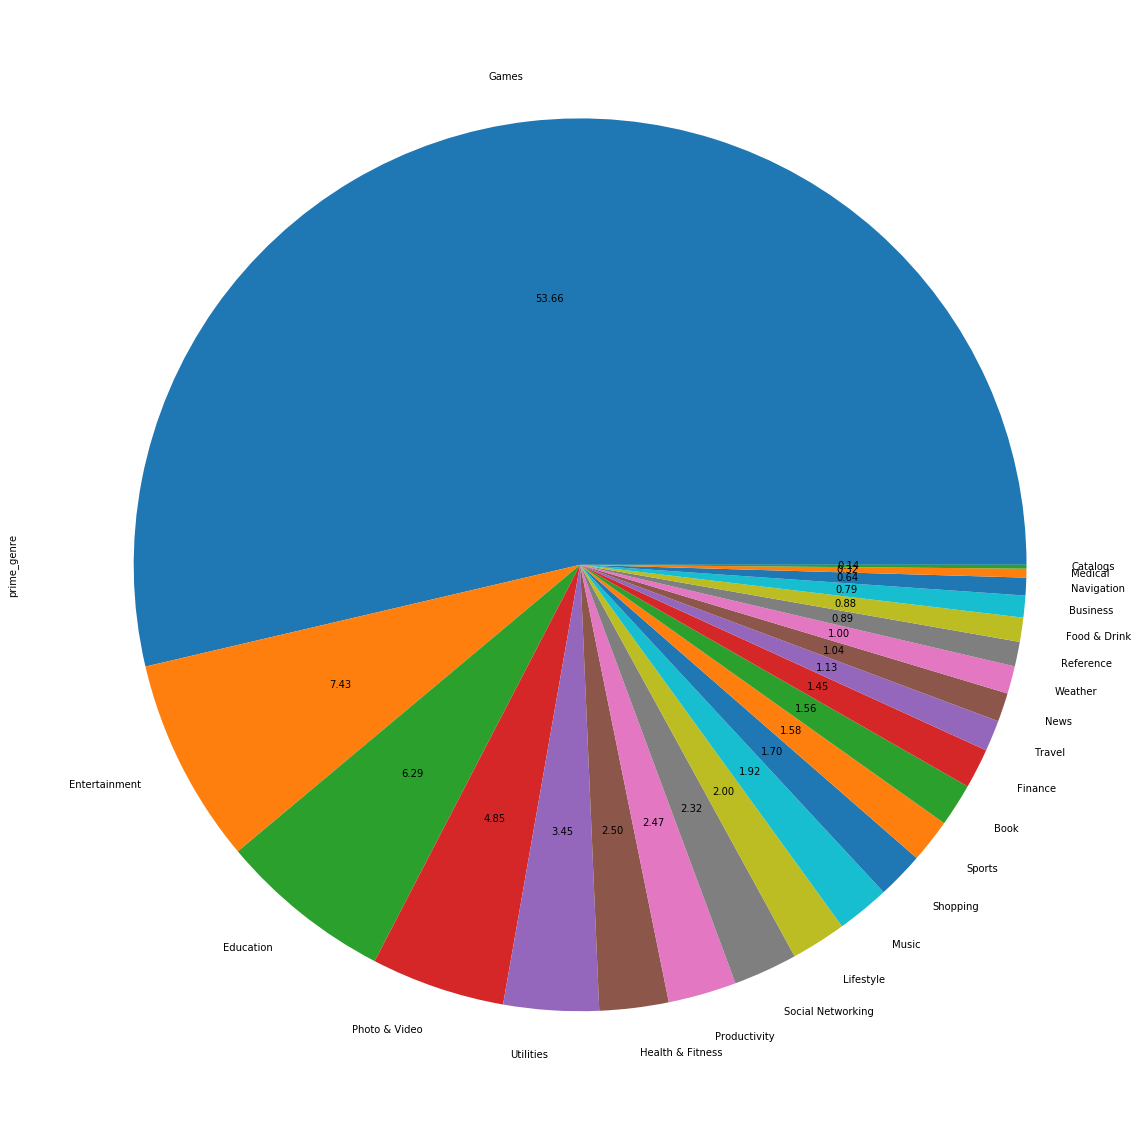

In [271]:
plt.figure(figsize=(20,40))
apple.prime_genre.value_counts().plot.pie(autopct='%.2f')
plt.show()

In [272]:
# OBSERVATION :

# Gameing category as many apps(54%),then Entertainment category (8%),then Education (7%),then followed by other categories

